First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Accuracy of Decision Tree Classifier: 1.00

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


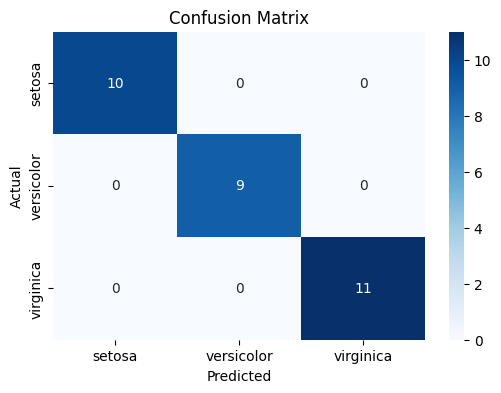

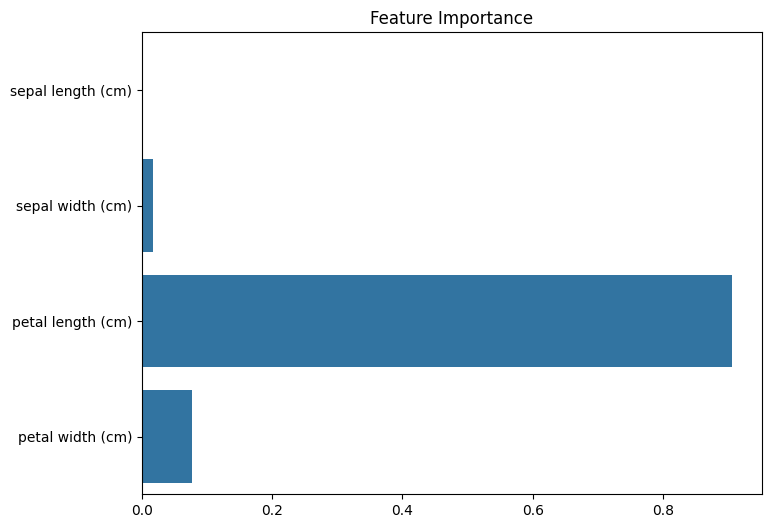

C:\Users\madha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\madha\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



The predicted class for the new sample is: setosa

Random Forest Classifier Accuracy: 1.00


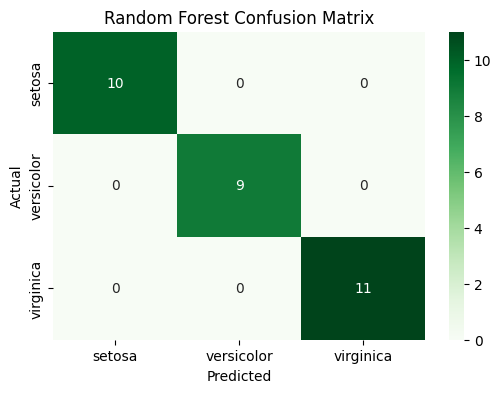

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])

# Combining features and target into one dataframe (optional)
df = pd.concat([X, y], axis=1)

# Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())  # Check for missing values

# Preprocessing - Normalizing the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy of Decision Tree Classifier: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance visualization
importances = clf.feature_importances_
feature_names = iris.feature_names

# Plotting the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

# Predicting for a new sample (Example: a flower with these specific features)
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Example of Iris-setosa features

# Scaling the new sample
new_sample_scaled = scaler.transform(new_sample)

# Making the prediction
prediction = clf.predict(new_sample_scaled)
predicted_class = iris.target_names[prediction[0]]
print(f'\nThe predicted class for the new sample is: {predicted_class}')

# Optional: Experiment with Another Model (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Making predictions
rf_y_pred = rf_clf.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'\nRandom Forest Classifier Accuracy: {rf_accuracy:.2f}')

# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Visualizing the Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
